<a href="https://colab.research.google.com/github/hlimatussaadiah-design/covid19-dashboard/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Project: PIMA Diabetes Dataset

# 1. Data Preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
# Load dataset
df = pd.read_csv('diabetes.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'

In [ ]:
# Quick view
print(df.shape)
print(df.head())
print(df.info())

(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose             

In [ ]:
print(df.describe())
print(df.isnull().sum())  # Check missing values
print(df.duplicated().sum())  # Check duplicates

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

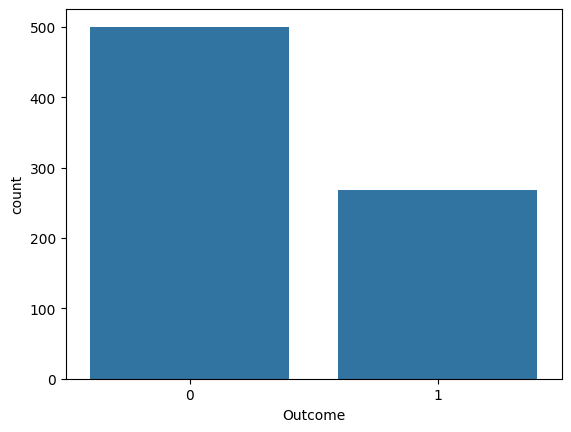

In [ ]:
sns.countplot(x="Outcome", data=df)
plt.show()

In [ ]:
# Handle missing values (Replace the 0 with NaN for specific columns)
cols_with_missing = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

print(df.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
#Replace missing values with median
for col in cols_with_missing:
    df[col] = df[col].fillna(df[col].median())


In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Outlier detection using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
# Convert types
df["Pregnancies"] = df["Pregnancies"].astype(int)
df["Age"] = df["Age"].astype(int)


In [ ]:
# PART B – FEATURE SELECTION & FEATURE ENGINEERING (Member 2 - Afrina)


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import shap

In [ ]:
# 1. Split Data

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# 2. FEATURE SELECTION USING RFE (Wrapper Method)

model = LogisticRegression(max_iter=500)
rfe = RFE(model, n_features_to_select=5)   # Select top 5 features
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("\nSelected Features (RFE):")
print(selected_features)

# Reduce dataset to selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]



Selected Features (RFE):
Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'], dtype='object')


In [ ]:
# 3. FEATURE ENGINEERING – Polynomial Features

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

print("\nShape before polynomial:", X_train_selected.shape)
print("Shape after polynomial:", X_train_poly.shape)

# 4. Model Training with Engineered Features

model_poly = LogisticRegression(max_iter=700)
model_poly.fit(X_train_poly, y_train)

score = model_poly.score(X_test_poly, y_test)
print("\nModel Accuracy with RFE + Polynomial Features:", score)


Shape before polynomial: (300, 5)
Shape after polynomial: (300, 20)

Model Accuracy with RFE + Polynomial Features: 0.7466666666666667


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
# PART B – Model Development (Member 3 - Ima)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    mean_squared_error, mean_absolute_error, r2_score, confusion_matrix
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#MODEL 1
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred_clf = clf.predict(X_test_scaled)
y_proba_clf = clf.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred_clf)
prec = precision_score(y_test, y_pred_clf)
rec = recall_score(y_test, y_pred_clf)
f1 = f1_score(y_test, y_pred_clf)
auc = roc_auc_score(y_test, y_proba_clf)

print("=== Classification: Random Forest ===")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("ROC-AUC:", auc)


In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_clf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
#Model 2
y_reg = df["Age"]
X_reg = df.drop("Age", axis=1)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

scaler_reg = StandardScaler()
Xr_train_scaled = scaler_reg.fit_transform(Xr_train)
Xr_test_scaled = scaler_reg.transform(Xr_test)

reg = LinearRegression()
reg.fit(Xr_train_scaled, yr_train)

y_pred_reg = reg.predict(Xr_test_scaled)

mae = mean_absolute_error(yr_test, y_pred_reg)
mse = mean_squared_error(yr_test, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(yr_test, y_pred_reg)

print("\n=== Regression: Linear Regression ===")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


In [3]:
#Actual Vs Predicted Plot
plt.scatter(yr_test, y_pred_reg, alpha=0.5)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Regression – Actual vs Predicted Age")
plt.show()


In [ ]:
#Model 3
model = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)


In [ ]:
#Evaluate ANN
y_pred_ann_prob = model.predict(X_test_scaled).ravel()
y_pred_ann = (y_pred_ann_prob > 0.5).astype(int)

print("\n=== ANN Classification ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ann))
print("Precision:", precision_score(y_test, y_pred_ann))
print("Recall:", recall_score(y_test, y_pred_ann))
print("F1 Score:", f1_score(y_test, y_pred_ann))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_ann_prob))


In [ ]:
#ANN Training Curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("ANN Loss Curve")
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("ANN Accuracy Curve")
plt.legend()
plt.show()


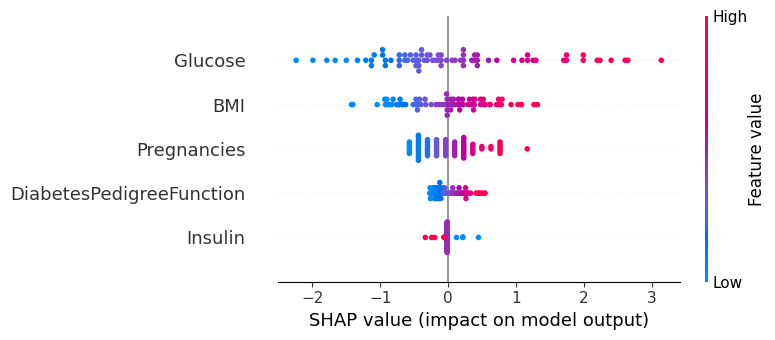

In [ ]:
# Bonus marks (B1): SHAP Interpretability

# Train a simple model using selected features for SHAP
model_shap = LogisticRegression(max_iter=700)
model_shap.fit(X_train_selected, y_train)

explainer = shap.Explainer(model_shap, X_train_selected)
shap_values = explainer(X_test_selected)

shap.summary_plot(shap_values, X_test_selected)